# CONTENTS

### 1.Extracting Relavant Features for Predictions

### 2.Finding Co-Relations

### 3.Fitting Linear Regressor

### 4.Fitting Decision Tree

### 5. Improvising Desicion Tree with Grid Search CV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('S:/Intern/3.ANZ/ANZ synthesised transaction dataset.xlsx')
import warnings
warnings.filterwarnings("ignore")

## 1.Extracting Relavant Features for Predictions

In [2]:
credit = data.loc[data['movement']=='credit']
debit = data.loc[data['movement']=='debit']
credit.index = pd.to_datetime(credit['date'])
debit.index = pd.to_datetime(debit['date'])

credit_mntly = pd.DataFrame(index = data.customer_id.unique())
debit_mntly = pd.DataFrame(index = data.customer_id.unique())

credit_mntly['mean'] = credit[['customer_id','amount']].groupby(['customer_id']).mean()
debit_mntly['mean'] = debit[['customer_id','amount']].groupby(['customer_id']).mean()
credit_mntly['std'] = credit[['customer_id','amount']].groupby(['customer_id']).std()
debit_mntly['std'] = debit[['customer_id','amount']].groupby(['customer_id']).std()

mntly = pd.DataFrame(index = data.customer_id.unique())
mntly['credit_mean'] = credit[['customer_id','amount']].groupby(['customer_id']).mean()
mntly['debit_mean'] = debit[['customer_id','amount']].groupby(['customer_id']).mean()
mntly['credit_std'] = credit[['customer_id','amount']].groupby(['customer_id']).std()
mntly['debit_std'] = debit[['customer_id','amount']].groupby(['customer_id']).std()
mntly['no._of_txns'] = data.customer_id.value_counts()

In [3]:
def impute_age(cust_id):
    lis = []
    for i in cust_id.to_list():
        lis.append(data[data['customer_id'] == i]['age'].to_list()[0])
    return lis

mntly['age'] = impute_age(mntly.index)

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
mntly

,credit_mean,debit_mean,credit_std,debit_std,no._of_txns,age
CUS-2487424745,1013.67,21.312429,0.0,72.903358,578,26
CUS-2142601169,1002.13,36.788828,0.0,150.499556,303,38
CUS-1614226872,892.09,31.257195,0.0,28.982558,259,40
CUS-2688605418,2320.30,53.889756,0.0,91.966486,129,20
CUS-4123612273,1068.04,61.329667,0.0,100.107046,134,43
...,...,...,...,...,...,...
CUS-2505971401,1946.57,49.511348,0.0,43.427926,102,40
CUS-2819545904,3231.26,100.833214,0.0,101.515215,63,42
CUS-3395687666,1757.81,107.916176,0.0,235.005089,40,42
CUS-1147642491,1711.39,64.121429,0.0,67.085104,118,34


# FEATURES EXTRACTED:

## credit_mean : Income/Salary of a Customer in a Month
## debit_mean  : Average Amount Spend by Customer in a Month
## credit_mean : How Salary is Varying in 3 Months
## debit_mean  : How Spend Money is Varying Month to Month
## no._of_txns  : Number of Transcations made by Customer in a Month
## age                :           Age of a Customer

## 2.Finding Co-Relations

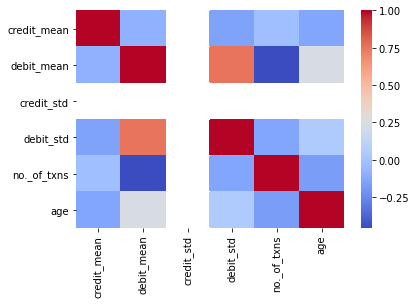

In [6]:
corr = mntly.corr()
sns.heatmap(corr,cmap='coolwarm')

From above Correlation plot Credit_mean is less co-related with other variables

In [7]:
predictors = ['debit_mean','debit_std','debit_std','no._of_txns','age']
X = np.array(mntly[predictors])
y = np.array(mntly[['credit_mean']])

In [8]:
print(X.shape,y.shape)

(100, 5) (100, 1)


In [9]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y)

## 3.Fitting Linear Regressor

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error
linear_regressor_rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))
print('linear_regressor_Root_Mean_Square_Error : ',linear_regressor_rmse)

linear_regressor_Root_Mean_Square_Error :  1344.2119118580106


In [12]:
keys = predictors
co = lr.coef_[0].tolist()
values = co
coeff = dict(zip(keys, values))
print(coeff)

{'debit_mean': 10.695063590649445, 'debit_std': -2.269327016038295, 'no._of_txns': 4.1442521265419465, 'age': -22.630820146136056}


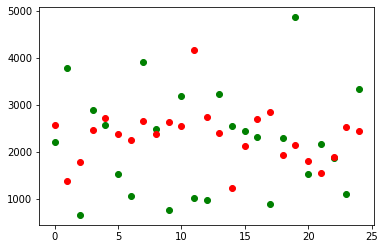

In [13]:
plt.scatter(range(len(X_test)),y_test,c = 'green')
plt.scatter(range(len(X_test)),lr.predict(X_test),c = 'red')

In [14]:
lr.score(X_test,y_test)

-0.5470402597977961

##  4.Fitting a Single Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion = 'mse',min_samples_split = 3)
tree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=3)

In [16]:
single_tree_rmse = np.sqrt(mean_squared_error(y_test,tree.predict(X_test)))
print('Root_Mean_Square_Error : ',single_tree_rmse)

Root_Mean_Square_Error :  1600.810248530412


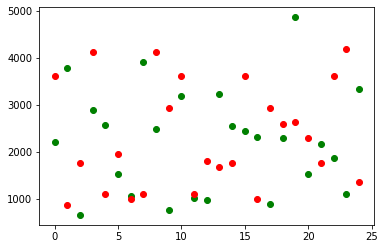

In [17]:
plt.scatter(range(len(X_test)),y_test,c = 'green')
plt.scatter(range(len(X_test)),tree.predict(X_test),c = 'red')

High Salary point predicted by model made its rmse value worse which may due to model may learned from outlier in training set.We can Reduce this error by cross validation 

In [18]:
keys = predictors
co = tree.feature_importances_.tolist()
values = co
coeff = dict(zip(keys, values))
print(coeff,sep = ',')

{'debit_mean': 0.5316715373317489, 'debit_std': 0.1418592207214318, 'no._of_txns': 0.15956403452330137, 'age': 0.09460515938892274}


Debit Mean and Age of customer have high influence on our model

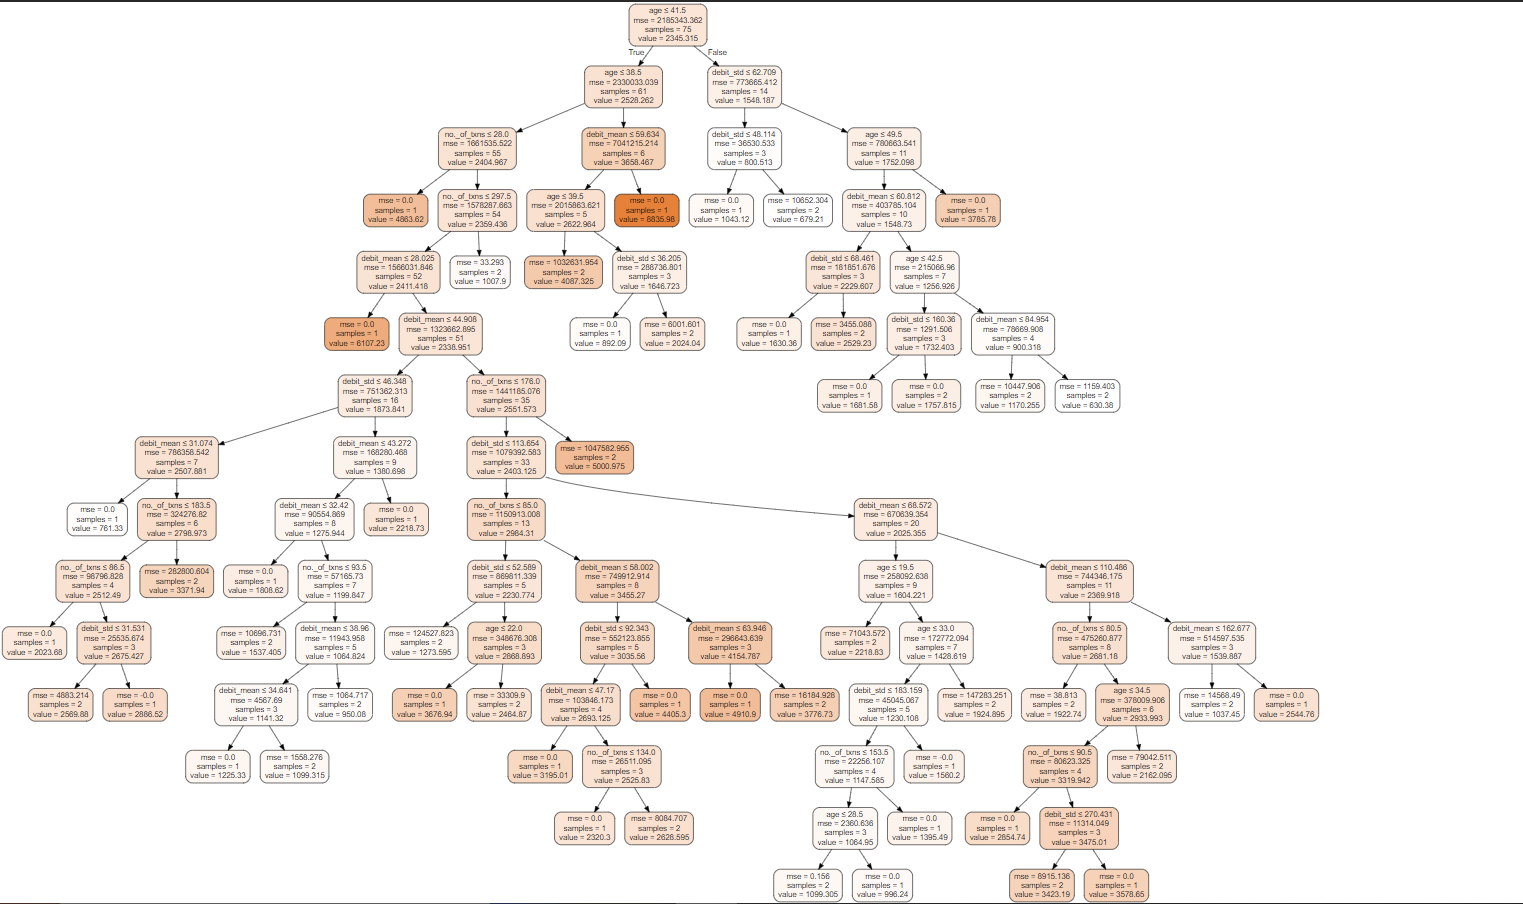

In [19]:
from PIL import Image
Image.open('tree_png.PNG')

## 5.Using Grid Search CV with Tree

In [20]:
from sklearn.model_selection import GridSearchCV
tree1 = DecisionTreeRegressor(criterion = 'mse',min_samples_split = 3)

param1 ={
             'min_samples_split' : [2,3],
             'max_features' : [2,3,4],
             'max_depth' :  [2,3,4,5,6,7,8,9,10]
            
        }

grid1 = GridSearchCV(estimator=tree1,param_grid=param1,cv=5,  verbose=1, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid1.fit(X_train, y_train)
best_params = grid_result.best_params_

grid_result.best_params_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.6s finished


{'max_depth': 3, 'max_features': 2, 'min_samples_split': 3}

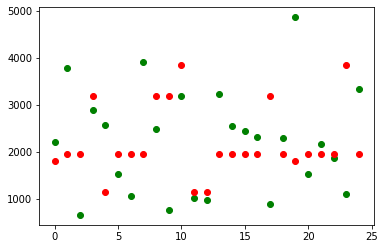

In [21]:
plt.scatter(range(len(X_test)),y_test,c = 'green')
plt.scatter(range(len(X_test)),grid1.predict(X_test),c = 'red')

In [22]:
single_tree_rmse_with_hyperparameter_tuning = np.sqrt(mean_squared_error(y_test,grid1.predict(X_test)))
print('Root_Mean_Square_Error_of_single_tree_with_hyperparameter_tuning : ',single_tree_rmse_with_hyperparameter_tuning)

Root_Mean_Square_Error_of_single_tree_with_hyperparameter_tuning :  1351.1286783341532


Finaly tree rmse reduced from above model with Hyperparameter tuning